In [147]:
!pip install deep-translator

In [178]:
import pandas as pd
import os
import seaborn as sns
from  matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [149]:
df=pd.read_csv('drive/My Drive/dataset.csv')

In [150]:
df.head()

,Product,Price,category,Filename,Retailer
0,ROBE EN SATIN IMPRIMÃE,"119,00 TND",dresses,zara.csv,zara
1,ROBE SATINÃE,"119,00 TND",dresses,zara.csv,zara
2,ROBE PORTEFEUILLE SATINÃE,"119,00 TND",dresses,zara.csv,zara
3,ROBE EN SATIN AVEC IMPRIMÃ Ã FLEURS,"139,00 TND",dresses,zara.csv,zara
4,ROBE SATINÃE,"139,00 TND",dresses,zara.csv,zara


In [151]:
#df.loc[646]

In [152]:
df.isnull().sum()

Product     0
Price       0
category    0
Filename    0
Retailer    0
dtype: int64

Our data doesn't contain null values.

In [153]:
df.dtypes

Product     object
Price       object
category    object
Filename    object
Retailer    object
dtype: object

The column 'Price' is an object. We need to convert it to a float.

So, the first thing to do is to get ride of the currency symbol.

In [154]:
def convert_currency_to_int(val):
  #these are the different caracteres noticed in the prices
  val=val.replace("TND","").replace(",",".").replace("Â","")
  try:
    val=float(val)
  except:
    val=0
  return val


def clean_col(row):
  current_value = row['Price']
  row['Price'] = convert_currency_to_int(current_value )
  return row 
df= df.apply(clean_col, axis=1)

print(df.head())

                                 Product  Price category  Filename Retailer
0                ROBE EN SATIN IMPRIMÃE  119.0  dresses  zara.csv     zara
1                          ROBE SATINÃE  119.0  dresses  zara.csv     zara
2             ROBE PORTEFEUILLE SATINÃE  119.0  dresses  zara.csv     zara
3  ROBE EN SATIN AVEC IMPRIMÃ Ã FLEURS  139.0  dresses  zara.csv     zara
4                          ROBE SATINÃE  139.0  dresses  zara.csv     zara


Now, our price column is no longer an object. 
Let's check that.

In [155]:
df.dtypes

Product      object
Price       float64
category     object
Filename     object
Retailer     object
dtype: object

Now, let's sort our data by price. 
from the cheapest to the most expensive.


In [156]:
df.sort_values(by=['Price'],inplace=True)
df.head()

,Product,Price,category,Filename,Retailer
646,Bottes cuir Goodyear welted,0.0,shoes,mango.csv,mango
867,NAFNAF â Blue Cotton-blend skinny pants,3.0,pants,drest.csv,drest
803,Robe blouse noire en jean Ã manches bouffantes,3.0,dresses,drest.csv,drest
1101,NAFNAF â Sac Ã main â mauve,3.0,accessories,drest.csv,drest
973,NAFNAF â T-SHIRT FLUIDE AVEC BORDURE EN DENT...,3.0,t-shirts,drest.csv,drest


The first value of price is 0. 

After verifying the row of index 646 before the conversion, we have found that it has the following value: ' 1Â 299,90 TND'

We don't know what is exactly the price for that article, so the best choice to do is to drop that row because we can't decide about its price. 

In [157]:
df = df.drop(646, axis=0)

So, now we have our data sortd by price.

Let's see the cheapest articles, their categories and where they are sold.

In [158]:
df.head(10)

,Product,Price,category,Filename,Retailer
867,NAFNAF â Blue Cotton-blend skinny pants,3.00,pants,drest.csv,drest
803,Robe blouse noire en jean Ã manches bouffantes,3.00,dresses,drest.csv,drest
1101,NAFNAF â Sac Ã main â mauve,3.00,accessories,drest.csv,drest
973,NAFNAF â T-SHIRT FLUIDE AVEC BORDURE EN DENT...,3.00,t-shirts,drest.csv,drest
931,RIVER ISLAND -Brown spot cropped blazer,3.00,blazers,drest.csv,drest
1037,DREST COLLECTION â Sandale Ã talon carrÃ© a...,3.00,shoes,drest.csv,drest
1154,NewLook â Black Faux Croc Mini Shoulder Bag,13.90,accessories,drest.csv,drest
308,Top,15.99,t-shirts,shana.csv,shana
773,DÃ©bardeur femme,15.99,t-shirts,HA.csv,HA
1005,Top noir froissÃ© Ã col V et manches chauve-s...,18.80,t-shirts,drest.csv,drest


We can understand that the cheapest articles are from 'drest', then 'shana' and 'HA'. 
Their categories are different. 

In [159]:
df.tail(10)

,Product,Price,category,Filename,Retailer
966,Gilet de costume blanc boutonnÃ© Ã coupe droite,679.0,blazers,drest.csv,drest
962,NafNaf â Veste Ã double boutonnage femme,719.0,blazers,drest.csv,drest
960,Maison 1 2 3 â Blue Mid-length jacket with t...,759.0,blazers,drest.csv,drest
953,Newlook â Blue Cropped Denim Jacket,819.0,blazers,drest.csv,drest
804,NAFNAF â Robe dâÃ©tÃ© femme Ã manches tra...,1144.9,dresses,drest.csv,drest
868,NAFNAF â Pantalon Droit noir pour femme,1144.9,pants,drest.csv,drest
974,"ETAM -KARMA DÃ©bardeur bas dentelle, Ecru",1144.9,t-shirts,drest.csv,drest
932,RIVER ISLAND -BLACK SL GATSBY VEST,1144.9,blazers,drest.csv,drest
1038,DREST COLLECTION â Sandale a talon pailletÃ©...,1144.9,shoes,drest.csv,drest
1102,NAFNAF â Skimono Ceinture Femme,1144.9,accessories,drest.csv,drest


Also, the most expensive ones are from 'drest'.

Now, notice that the name of the articles are in french.
Let's translate them to english.
we first need to remove the non ascii characters.

In [160]:
def encode_product(s):
  s=s.encode("ascii", "ignore")
  s=s.decode("utf-8") 
  return s


def clean_prod(row):
  current_value = row['Product']
  row['Product'] = encode_product(current_value)
  return row 

df= df.apply(clean_prod, axis=1)

print(df.head())

                                              Product  ...  Retailer
867            NAFNAF  Blue Cotton-blend skinny pants  ...     drest
803     Robe blouse noire en jean  manches bouffantes  ...     drest
1101                         NAFNAF  Sac  main  mauve  ...     drest
973   NAFNAF  T-SHIRT FLUIDE AVEC BORDURE EN DENTELLE  ...     drest
931           RIVER ISLAND -Brown spot cropped blazer  ...     drest

[5 rows x 5 columns]


Now, we do the translation of the name of the product from French to English.

In [161]:
from deep_translator import GoogleTranslator


In [162]:
def translate_product(s):
  current= s 
  s = GoogleTranslator(source='fr', target="en").translate(current)
  return s


def translate_prod(row):
  current_value = row['Product']
  row['Product'] = translate_product(current_value)
  return row 

df= df.apply(translate_prod, axis=1)

print(df.head())

                                      Product  Price  ...   Filename Retailer
867     NAFNAF Blue Cotton-blend skinny pants    3.0  ...  drest.csv    drest
803      Black puff sleeve denim blouse dress    3.0  ...  drest.csv    drest
1101                     NAFNAF Handbag mauve    3.0  ...  drest.csv    drest
973       NAFNAF FLUID T-SHIRT WITH LACE TRIM    3.0  ...  drest.csv    drest
931   RIVER ISLAND -Brown spot cropped blazer    3.0  ...  drest.csv    drest

[5 rows x 5 columns]


In [167]:
df['Price'].describe()

count    1164.000000
mean      127.179871
std       114.646304
min         3.000000
25%        63.990000
50%       104.900000
75%       139.000000
max      1144.900000
Name: Price, dtype: float64

We can see here that the minimum price is 3 TND , the maximum is 1144 TND. The median value is 104 TND and the standard deviation is 114.65

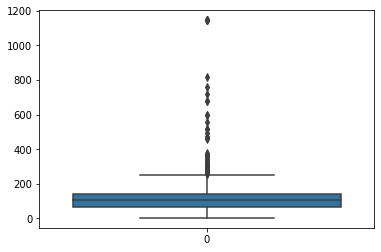

In [171]:
sns.boxplot(data=df['Price'])

The outliers are basically between 400 and 1200.

Using the box plot, we conclude that we have outliers. 
These outliers indicate variance in our data but they can affect further statistical modelling. 

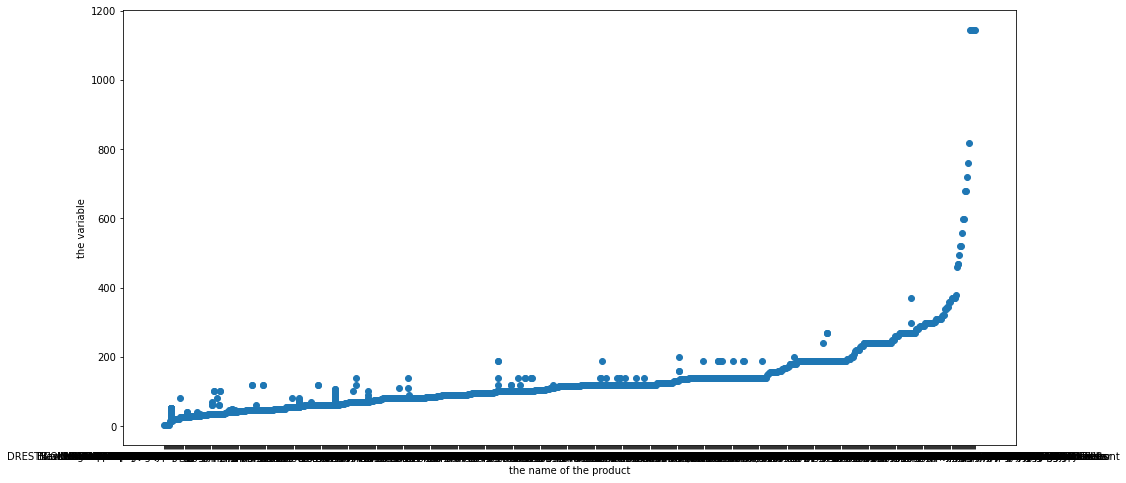

In [177]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Product'], df['Price'])
ax.set_xlabel('the name of the product')
ax.set_ylabel('the variable')
plt.show()

Looking at the plot above, we can see that most of data points are lying in the bottom but there are points which are far from the other observations like top right corner.

let's discover these outliers with mathematical function z-score.

In [181]:
z = np.abs(stats.zscore(df['Price']))
print(z)

[1.08362192 1.08362192 1.08362192 ... 8.88085829 8.88085829 8.88085829]


In [184]:
threshold = 3
print(np.where(z > 8))

(array([1158, 1159, 1160, 1161, 1162, 1163]),)


In [185]:
df['Price_zscore'] = (df['Price'] - df['Price'].mean())/df['Price'].std(ddof=0)
df.head()

,Product,Price,category,Filename,Retailer,Price_zscore
867,NAFNAF Blue Cotton-blend skinny pants,3.0,pants,drest.csv,drest,-1.083622
803,Black puff sleeve denim blouse dress,3.0,dresses,drest.csv,drest,-1.083622
1101,NAFNAF Handbag mauve,3.0,accessories,drest.csv,drest,-1.083622
973,NAFNAF FLUID T-SHIRT WITH LACE TRIM,3.0,t-shirts,drest.csv,drest,-1.083622
931,RIVER ISLAND -Brown spot cropped blazer,3.0,blazers,drest.csv,drest,-1.083622


Creating a new column in my data frame, which would be called "data_zscore" where I take the row value and I subtract that columns mean from that row value and divide by the standard deviation of that column. Normalized by N-1 by default.
Z-Score is essentially how many standard deviations away is my actual value from the mean value based on the business context

we define the threshold value for the z score to classify a point as an outlier or not in the current scheme of things. Here we pass 3 for the threshold value as seen below:

In [187]:
df['Price_zscore'].value_counts()

 0.103145    126
-0.071379    107
 0.539457     75
-0.238050     55
-0.412575     41
            ... 
 5.164358      1
-0.442331      1
 2.201803      1
-0.402976      1
 2.903392      1
Name: Price_zscore, Length: 182, dtype: int64

In [188]:
df["outlier"] = (abs(df['Price_zscore'])>3).astype(int)

In [189]:
df.head()

,Product,Price,category,Filename,Retailer,Price_zscore,outlier
867,NAFNAF Blue Cotton-blend skinny pants,3.0,pants,drest.csv,drest,-1.083622,0
803,Black puff sleeve denim blouse dress,3.0,dresses,drest.csv,drest,-1.083622,0
1101,NAFNAF Handbag mauve,3.0,accessories,drest.csv,drest,-1.083622,0
973,NAFNAF FLUID T-SHIRT WITH LACE TRIM,3.0,t-shirts,drest.csv,drest,-1.083622,0
931,RIVER ISLAND -Brown spot cropped blazer,3.0,blazers,drest.csv,drest,-1.083622,0


In [190]:
df.tail()

,Product,Price,category,Filename,Retailer,Price_zscore,outlier
868,NAFNAF Black straight pants for women,1144.9,pants,drest.csv,drest,8.880858,1
974,"ETAM -KARMA Lace hem tank top, Ecru",1144.9,t-shirts,drest.csv,drest,8.880858,1
932,RIVER ISLAND -BLACK SL GATSBY VEST,1144.9,blazers,drest.csv,drest,8.880858,1
1038,DREST COLLECTION Glitter heeled sandal in black,1144.9,shoes,drest.csv,drest,8.880858,1
1102,NAFNAF Skimono Belt Women,1144.9,accessories,drest.csv,drest,8.880858,1


You can see that the highest prices are considered as outliers because for these retailers most of the articles have a low or average price. The number of highly expensive articles is very low compared to the rest of articles. 

Let' get all of the outliers. 

In [191]:
df.loc[df.outlier == 1]

,Product,Price,category,Filename,Retailer,Price_zscore,outlier
942,SALSA JEANS Oversized denim jacket with synthe...,494.9,blazers,drest.csv,drest,3.208810,1
956,Newlook Gray Oversized Blazer,519.0,blazers,drest.csv,drest,3.419112,1
946,RIVER ISLAND -BLACK TWILL DB BLAZER,519.0,blazers,drest.csv,drest,3.419112,1
958,NewLook Black sudine biker jacket,559.0,blazers,drest.csv,drest,3.768161,1
861,Newlook Short brick red linen effect jumpsuit ...,599.0,dresses,drest.csv,drest,4.117210,1
822,Newlook White button-down linen-effect playsuit,599.0,dresses,drest.csv,drest,4.117210,1
964,Short blue denim jacket,679.0,blazers,drest.csv,drest,4.815308,1
966,White straight cut button-down suit waistcoat,679.0,blazers,drest.csv,drest,4.815308,1
962,NafNaf Women's double-breasted jacket,719.0,blazers,drest.csv,drest,5.164358,1
960,Maison 1 2 3 Blue Mid-length jacket with tailo...,759.0,blazers,drest.csv,drest,5.513407,1


Here, the outliers are not due to incorrectly entered or measured data.

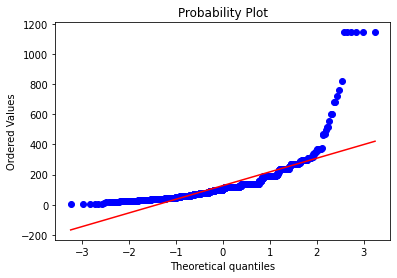

In [192]:
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.show()

The problem is that these outliers are not sampling mistakes. They represent the price range and the number of corresponding articles in this industrie. 

That's why, it's not a good idea to drop them or transform them. 


Now, we drop the outlier and z-score columns. 

In [199]:
df.drop(['Price_zscore','outlier'], axis = 1, inplace=True)

In [200]:
df.head()

,Product,Price,category,Filename,Retailer
867,NAFNAF Blue Cotton-blend skinny pants,3.0,pants,drest.csv,drest
803,Black puff sleeve denim blouse dress,3.0,dresses,drest.csv,drest
1101,NAFNAF Handbag mauve,3.0,accessories,drest.csv,drest
973,NAFNAF FLUID T-SHIRT WITH LACE TRIM,3.0,t-shirts,drest.csv,drest
931,RIVER ISLAND -Brown spot cropped blazer,3.0,blazers,drest.csv,drest


Let's now save the pre-processed data and move to the next step.

In [202]:
df.to_csv('preprocessed_dataset.csv',index=False)